In [1]:
from UQpy.Reliability import SubsetSimulation
import matplotlib.pyplot as plt
from UQpy.SampleMethods import MMH, Stretch
# First import the file that contains the newly defined Rosenbrock distribution
from Rosenbrock import Rosenbrock
import time
import numpy as np
# Import this newly defined Rosenbrock distribution into the Distributions module
from UQpy.Distributions import Normal
from UQpy.RunModel import RunModel
import scipy.stats as stats

MMH Initial Samples

In [2]:
model = RunModel(model_script='Rosenbrock_pfn.py', model_object_name="RunPythonModel", ntasks=1)
dist = Rosenbrock(p=100.)
dist_prop1 = Normal(loc=0, scale=1)
dist_prop2 = Normal(loc=0, scale=10)

x = stats.norm.rvs(loc=0, scale=1, size=(100,2), random_state=83276)

mcmc_init1 = MMH(dimension=2, log_pdf_target=dist.log_pdf, seed=x, nburn=1000, 
                 proposal=[dist_prop1, dist_prop2], random_state=8765)
mcmc_init1.run(10000)

x_ss_MMH = SubsetSimulation(mcmc_class=Stretch, runmodel_object=model, p_cond=0.1, 
                            nsamples_per_ss=10000, verbose=False, samples_init=mcmc_init1.samples, 
                            log_pdf_target=dist.log_pdf, dimension=2, nchains=1000, random_state=38546)

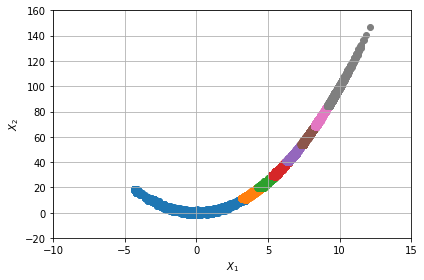

In [3]:
for i in range(len(x_ss_MMH.g)):
    plt.scatter(x_ss_MMH.samples[i][:, 0], x_ss_MMH.samples[i][:, 1], marker='o')
plt.grid(True)
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.yticks(np.arange(-20, 180, step=20))
plt.xlim((-10,15))
plt.tight_layout()
plt.savefig('Rosenbrock_MMH.pdf')
plt.show()

In [4]:
print(x_ss_MMH.pf)

4.0450000000000015e-08


Stretch Initial Samples

In [5]:
model = RunModel(model_script='Rosenbrock_pfn.py', model_object_name="RunPythonModel", ntasks=1)
dist = Rosenbrock(p=100.)

x = stats.norm.rvs(loc=0, scale=1, size=(100,2), random_state=83276)

# mcmc_init2 = Stretch(dimension=2, log_pdf_target=dist.log_pdf, seed=x, jump=100, nburn=1000, random_state=8765)
mcmc_init2 = Stretch(dimension=2, log_pdf_target=dist.log_pdf, seed=x, nburn=1000, random_state=8765)
mcmc_init2.run(10000)

# dist = Distribution(dist_name='rosenbrock', params=[10])
# dist_prop = [Distribution(dist_name=['normal'], params=[[0, 1]]), 
#             Distribution(dist_name=['normal'], params=[[0, 10]])]
# mcmc_object = MCMC(dimension=2, algorithm='Stretch', log_pdf_target=dist.log_pdf, seed=x)
x_ss_Stretch = SubsetSimulation(mcmc_class=Stretch, runmodel_object=model, p_cond=0.1, 
                            nsamples_per_ss=10000, verbose=False, samples_init=mcmc_init2.samples, 
                            log_pdf_target=dist.log_pdf, dimension=2, nchains=1000, random_state=83456)

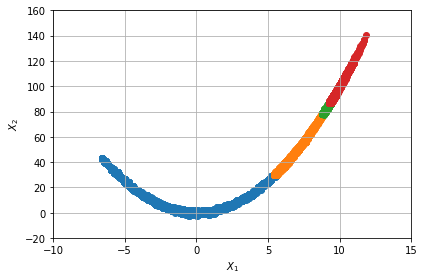

In [6]:
for i in range(len(x_ss_Stretch.g)):
    plt.scatter(x_ss_Stretch.samples[i][:, 0], x_ss_Stretch.samples[i][:, 1], marker='o')
plt.grid(True)
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.yticks(np.arange(-20, 180, step=20))
plt.xlim((-10,15))
plt.tight_layout()
plt.savefig('Rosenbrock_Stretch.pdf')
plt.show()

In [7]:
print(x_ss_Stretch.pf)

0.0004715000000000001


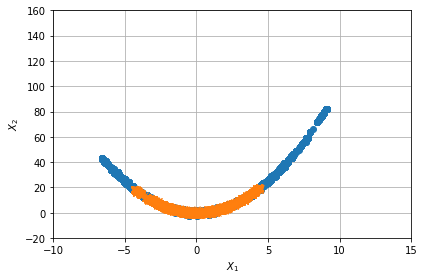

In [8]:
plt.figure()
plt.plot(mcmc_init2.samples[:,0], mcmc_init2.samples[:,1],'o')
plt.plot(mcmc_init1.samples[:,0], mcmc_init1.samples[:,1],'x')
plt.grid(True)
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.yticks(np.arange(-20, 180, step=20))
plt.xlim((-10,15))
plt.tight_layout()
plt.savefig('Rosenbrock_Compare.pdf')
plt.show()